In [1]:
"""
Created on May 12 2023

@author: rodrigo pena
"""

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['savefig.dpi'] = 120
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

torch.manual_seed(0)

import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU


In [2]:
class Net_relu(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net_relu,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.linear2 = nn.Linear(H,D_out)
        
    def forward(self,x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [3]:
acum=[]
for dd in range(40):

    filename = "nl_signal" + str(dd) + ".dat"
    data_cxy = np.loadtxt(filename).astype(np.float32)
    filename = "nl_lbs" + str(dd) + ".dat"
    label_cxy = np.loadtxt(filename).astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)

    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.01
    # compare lr with real spk trains
    H=10
    epochs=2000

    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()

    my_data_train = []
    my_data_val = []
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else:    
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])

    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)

    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)

    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()

            correct = 0
            for x_test, y_test in val_set:
                z = model(x_test)
                _, yhat = torch.max(z.data,1)
                correct += (yhat == y_test).sum().item()
            accuracy = correct / N_test
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    train_model(epochs)

    acum.append(accuracy_list[-1])

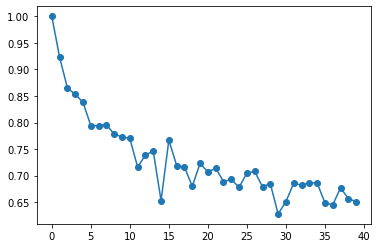

In [4]:
plt.plot(acum,'o-')

In [5]:
acum

[1.0,
 0.923,
 0.865,
 0.853,
 0.838,
 0.794,
 0.794,
 0.796,
 0.778,
 0.773,
 0.77,
 0.716,
 0.739,
 0.746,
 0.653,
 0.767,
 0.719,
 0.716,
 0.68,
 0.723,
 0.707,
 0.714,
 0.689,
 0.693,
 0.678,
 0.705,
 0.708,
 0.679,
 0.685,
 0.628,
 0.651,
 0.686,
 0.682,
 0.687,
 0.686,
 0.649,
 0.645,
 0.677,
 0.657,
 0.651]

In [6]:
acum=[]
for dd in range(40):

    filename = "nfbl_vs_nfbl_signal" + str(dd) + ".dat"
    data_cxy = np.loadtxt(filename).astype(np.float32)
    filename = "nfbl_vs_nfbl_lbs" + str(dd) + ".dat"
    label_cxy = np.loadtxt(filename).astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)

    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.01
    # compare lr with real spk trains
    H=10
    epochs=2000

    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()

    my_data_train = []
    my_data_val = []
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else:    
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])

    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)

    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)

    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()

            correct = 0
            for x_test, y_test in val_set:
                z = model(x_test)
                _, yhat = torch.max(z.data,1)
                correct += (yhat == y_test).sum().item()
            accuracy = correct / N_test
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    train_model(epochs)

    acum.append(accuracy_list[-1])

(0.4, 0.6)

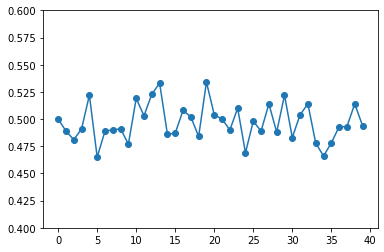

In [7]:
plt.plot(acum,'o-')
plt.ylim([0.4,0.6])

In [8]:
acum

[0.5,
 0.489,
 0.481,
 0.491,
 0.522,
 0.465,
 0.489,
 0.49,
 0.491,
 0.477,
 0.519,
 0.503,
 0.523,
 0.533,
 0.486,
 0.487,
 0.508,
 0.502,
 0.484,
 0.534,
 0.504,
 0.5,
 0.49,
 0.51,
 0.469,
 0.498,
 0.489,
 0.514,
 0.488,
 0.522,
 0.483,
 0.504,
 0.514,
 0.478,
 0.466,
 0.478,
 0.493,
 0.493,
 0.514,
 0.494]

In [9]:
acum=[]
for dd in range(40):

    filename = "iffl_vs_iffl_signal" + str(dd) + ".dat"
    data_cxy = np.loadtxt(filename).astype(np.float32)
    filename = "iffl_vs_iffl_lbs" + str(dd) + ".dat"
    label_cxy = np.loadtxt(filename).astype(np.float32)
    data_cxy = torch.from_numpy(data_cxy)
    label_cxy = torch.from_numpy(label_cxy)

    input_dim = len(data_cxy[0])
    output_dim = 2
    learning_rate=0.01
    # compare lr with real spk trains
    H=10
    epochs=2000

    model = Net_relu(input_dim,H,output_dim)
    optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate, momentum=0.2)
    criterion = nn.CrossEntropyLoss()

    my_data_train = []
    my_data_val = []
    for i in range(len(data_cxy)):
        if i < len(data_cxy)*0.75:
            my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
        else:    
            my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])

    train_set = torch.utils.data.DataLoader(dataset=my_data_train,shuffle=True,batch_size=250)
    val_set = torch.utils.data.DataLoader(dataset=my_data_val,shuffle=True,batch_size=250)

    loss_list = []
    accuracy_list = []
    N_test = len(my_data_val)

    def train_model(n_epochs):
        for epoch in range(n_epochs):
            for x,y in train_set:
                optimizer.zero_grad()
                z = model(x)
                loss = criterion(z,y)
                loss.backward()
                optimizer.step()

            correct = 0
            for x_test, y_test in val_set:
                z = model(x_test)
                _, yhat = torch.max(z.data,1)
                correct += (yhat == y_test).sum().item()
            accuracy = correct / N_test
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    train_model(epochs)

    acum.append(accuracy_list[-1])

(0.4, 0.6)

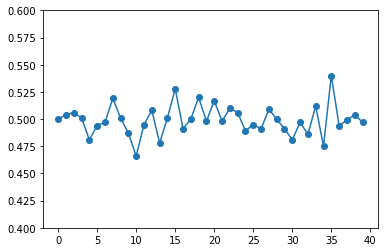

In [10]:
plt.plot(acum,'o-')
plt.ylim([0.4,0.6])

In [11]:
acum

[0.5,
 0.504,
 0.506,
 0.501,
 0.481,
 0.494,
 0.497,
 0.519,
 0.501,
 0.487,
 0.466,
 0.495,
 0.508,
 0.478,
 0.501,
 0.528,
 0.491,
 0.5,
 0.52,
 0.498,
 0.517,
 0.498,
 0.51,
 0.506,
 0.489,
 0.495,
 0.491,
 0.509,
 0.5,
 0.491,
 0.481,
 0.497,
 0.486,
 0.512,
 0.475,
 0.54,
 0.494,
 0.499,
 0.504,
 0.497]